<a href="https://colab.research.google.com/github/Coder240807/Data-analysis-/blob/main/Page_View_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/content/fcc-forum-pageviews.csv', parse_dates=["date"] , index_col="date")

In [23]:
df = df[
    (df["value"] >= df["value"].quantile(0.025)) &
    (df["value"] <= df["value"].quantile(0.975))
]

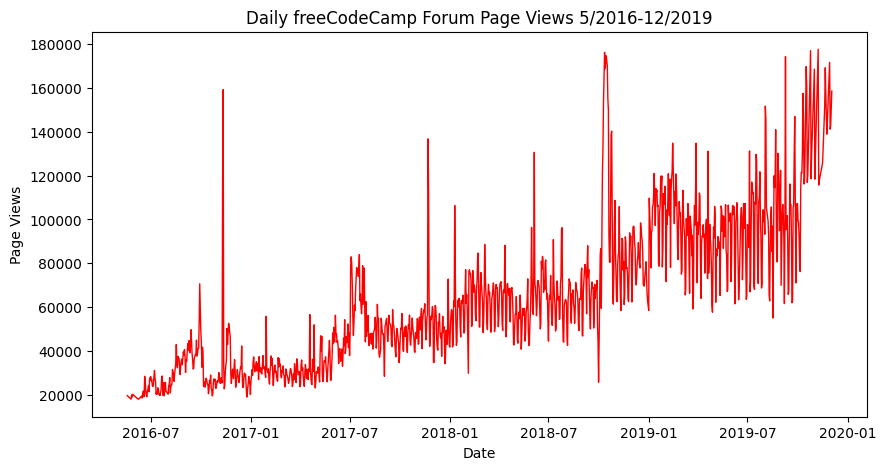

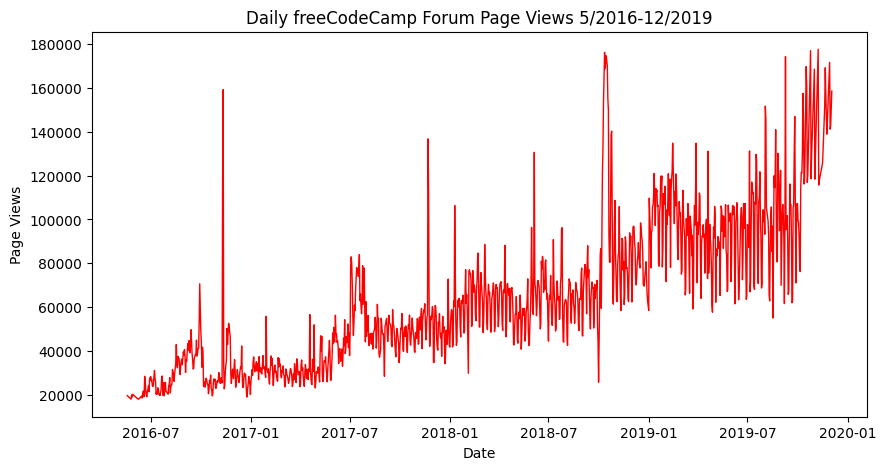

In [27]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(10,5))  # Fixed typo here
    ax.plot(df.index, df['value'], 'r', linewidth=1)

    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    fig.savefig('line_plot.png')
    return fig

draw_line_plot()


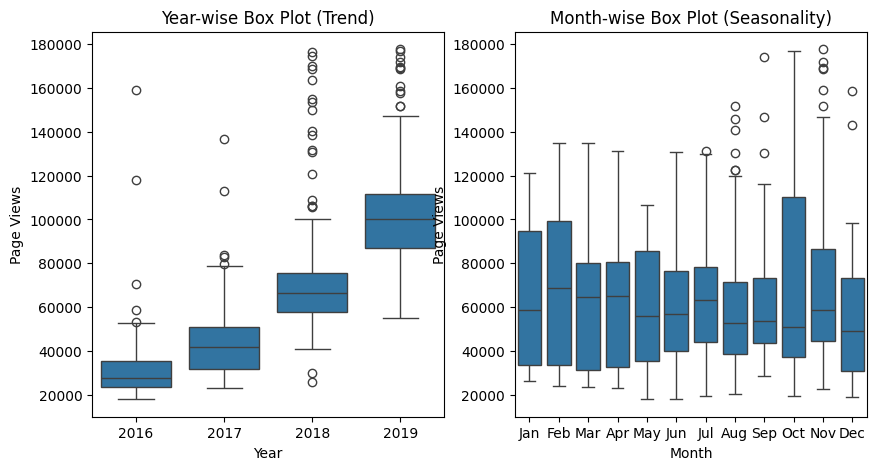

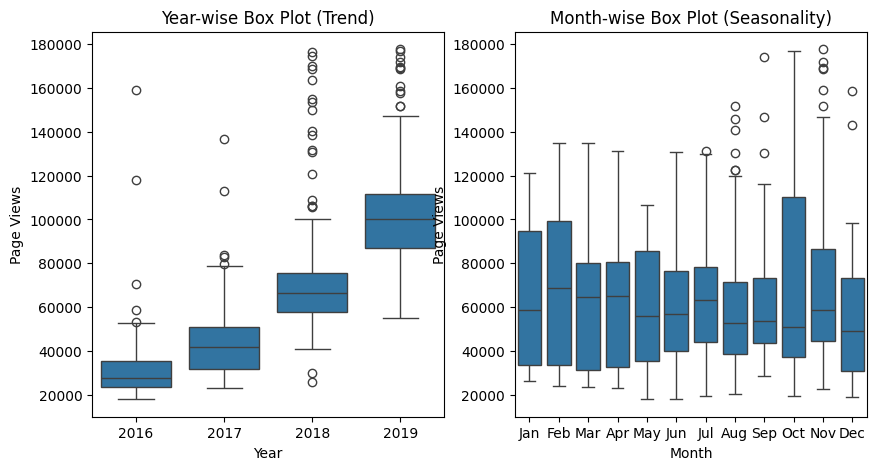

In [38]:
def draw_bar_plot():
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]

  df_box["month_num"] = df_box["date"].dt.month
  df_box=df_box.sort_values("month_num")

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
  axes[0] =sns.boxplot(x=df_box["year"], y=df_box["value"], ax=axes[0])
  axes[1] =sns.boxplot(x=df_box["month"], y=df_box["value"], ax=axes[1])

  axes[0].set_title("Year-wise Box Plot (Trend)")
  axes[0].set_xlabel("Year")
  axes[0].set_ylabel("Page Views")

  axes[1].set_title("Month-wise Box Plot (Seasonality)")
  axes[1].set_xlabel("Month")
  axes[1].set_ylabel("Page Views")

  fig.savefig('bar_plot.png')
  return fig

draw_bar_plot()